<a href="https://colab.research.google.com/github/gpasxos/large-scale-optimization/blob/main/ch02_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal weights: [3.33755916 3.5079981 ]
Optimal bias: -0.2853573680485975


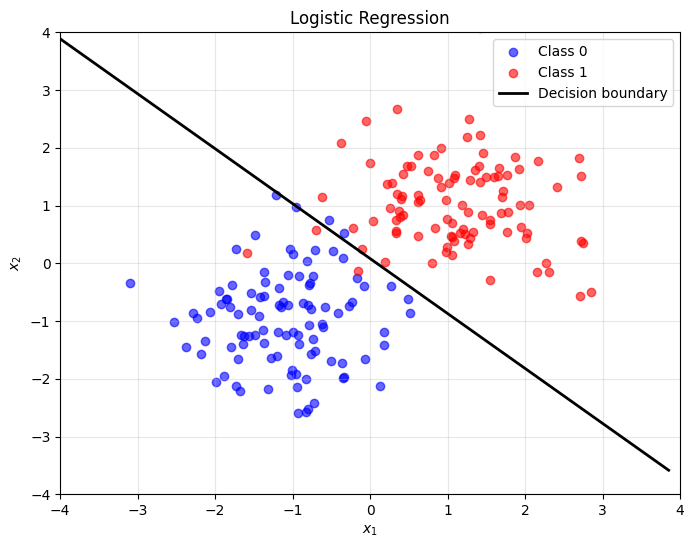

In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Generate cleaner synthetic classification data
np.random.seed(42)
n_per_class = 100

# Class 0: centered at (-1, -1)
X0 = np.random.randn(n_per_class, 2) * 0.8 + np.array([-1, -1])
# Class 1: centered at (1, 1)
X1 = np.random.randn(n_per_class, 2) * 0.8 + np.array([1, 1])

X = np.vstack([X0, X1])
y = np.hstack([np.zeros(n_per_class), np.ones(n_per_class)])

# Shuffle the data
perm = np.random.permutation(len(y))
X, y = X[perm], y[perm]

# Solve logistic regression using CVXPY
n_samples, n_features = X.shape
w = cp.Variable(n_features)
b = cp.Variable()

# Logistic loss: sum of log(1 + exp(-y_i * (w'x_i + b)))
# Convert y from {0,1} to {-1,+1}
y_signed = 2 * y - 1
loss = cp.sum(cp.logistic(-cp.multiply(y_signed, X @ w + b)))

problem = cp.Problem(cp.Minimize(loss))
problem.solve()

print(f"Optimal weights: {w.value}")
print(f"Optimal bias: {b.value}")

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Class 0', alpha=0.6)
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Class 1', alpha=0.6)

# Decision boundary: w'x + b = 0
x1_range = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x2_boundary = -(w.value[0] * x1_range + b.value) / w.value[1]
plt.plot(x1_range, x2_boundary, 'k-', linewidth=2, label='Decision boundary')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend()
plt.title('Logistic Regression')
plt.grid(True, alpha=0.3)
plt.savefig('logistic_regression.pdf', bbox_inches='tight')
plt.show()